In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
folder_path = '/content/drive/MyDrive/a'


In [3]:
!python3 /content/drive/MyDrive/a/train.py


Dataset Size:
Train: 80 - Valid: 20

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Valid loss improved from inf to 1.3393. Saving checkpoint: files/checkpoint.pth
Epoch: 01 | Epoch Time: 1m 35s
	Train Loss: 1.166
	 Val. Loss: 1.339

Valid loss improved from 1.3393 to 0.9890. Saving checkpoint: files/checkpoint.pth
Epoch: 02 | Epoch Time: 0m 39s
	Train Loss: 0.981
	 Val. Loss: 0.989

Valid loss improved from 0.9890 to 0.8875. Saving checkpoint: files/checkpoint.pth
Epoch: 03 | Epoch Time: 0m 38s
	Train Loss: 0.921
	 Val. Loss: 0.887

Valid loss improved from 0.8875 to 0.8546. Saving checkpoint: files/checkpoint.pth
Epoch: 04 | Epoch Time: 0m 38s
	Train Loss: 0.875
	 Val. Loss: 0.855

Valid loss improved from 0.8546 to 0.8171. Saving checkpoint: files/checkpoint.pth
Epoch: 05 | Epoch Time: 0m 38s
	Train Loss: 0.837
	 Val. Loss: 0.817

Valid lo

In [5]:
!python3 /content/drive/MyDrive/a/test.py


  0% 0/20 [00:00<?, ?it/s][ WARN:0@3.688] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.
100% 20/20 [00:06<00:00,  3.06it/s]
Jaccard: 0.6685 - F1: 0.8011 - Recall: 0.8195 - Precision: 0.7891 - Acc: 0.9647
FPS:  34.85186951687875


In [6]:
!zip -r results.zip results


  adding: results/ (stored 0%)
  adding: results/masks/ (stored 0%)
  adding: results/masks/20_test_0_mask.png (deflated 14%)
  adding: results/masks/02_test_0_mask.png (deflated 15%)
  adding: results/masks/01_test_0_mask.png (deflated 14%)
  adding: results/masks/06_test_0_mask.png (deflated 13%)
  adding: results/masks/05_test_0_mask.png (deflated 13%)
  adding: results/masks/07_test_0_mask.png (deflated 13%)
  adding: results/masks/18_test_0_mask.png (deflated 13%)
  adding: results/masks/15_test_0_mask.png (deflated 14%)
  adding: results/masks/17_test_0_mask.png (deflated 14%)
  adding: results/masks/03_test_0_mask.png (deflated 13%)
  adding: results/masks/04_test_0_mask.png (deflated 14%)
  adding: results/masks/19_test_0_mask.png (deflated 15%)
  adding: results/masks/10_test_0_mask.png (deflated 15%)
  adding: results/masks/16_test_0_mask.png (deflated 15%)
  adding: results/masks/08_test_0_mask.png (deflated 13%)
  adding: results/masks/14_test_0_mask.png (deflated 13%)
  ad

In [7]:
from google.colab import files
files.download("results.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

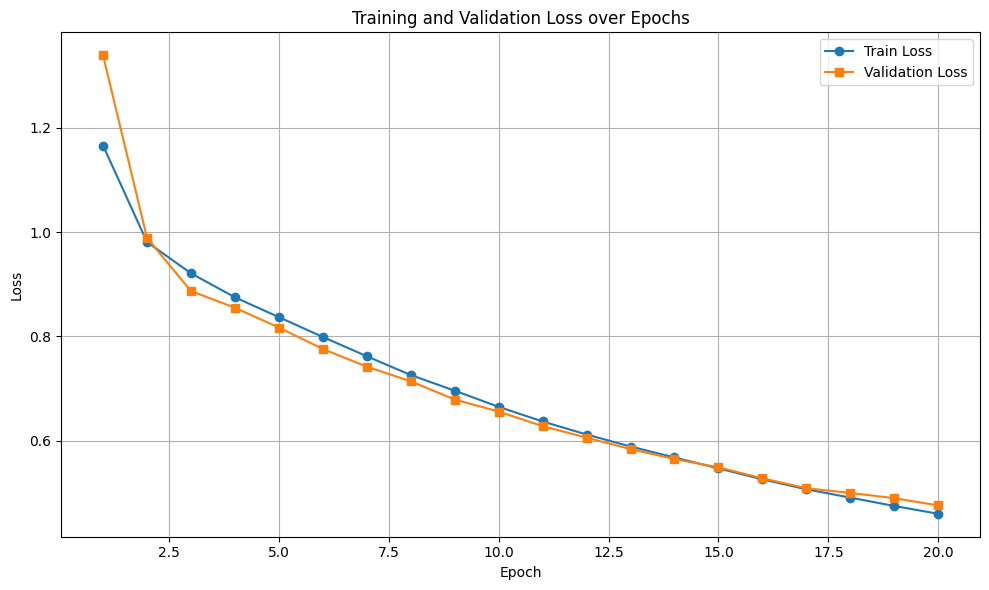

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

# Epochs and loss values
epochs = list(range(1, 21))
train_losses = [
    1.166, 0.981, 0.921, 0.875, 0.837, 0.799, 0.762, 0.726, 0.696, 0.665,
    0.637, 0.612, 0.589, 0.568, 0.547, 0.526, 0.507, 0.491, 0.475, 0.460
]
val_losses = [
    1.339, 0.989, 0.887, 0.855, 0.817, 0.776, 0.742, 0.714, 0.679, 0.656,
    0.628, 0.606, 0.584, 0.565, 0.549, 0.528, 0.509, 0.500, 0.490, 0.476
]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='s')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Save the plot (optional)
plt.savefig("loss_curve.png")


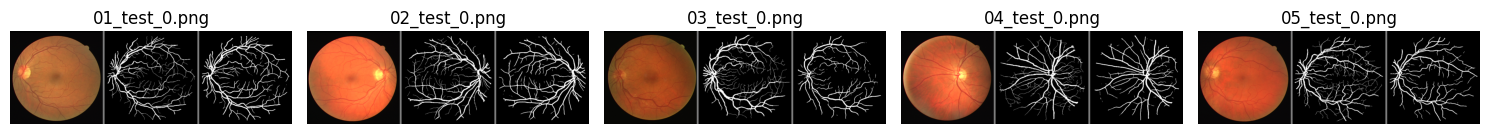

In [9]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to your saved result images
results_dir = "results/"
result_files = sorted(os.listdir(results_dir))[:5]  # Show first 5 images

# Plot the results
plt.figure(figsize=(15, 10))
for i, file_name in enumerate(result_files):
    img_path = os.path.join(results_dir, file_name)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.title(file_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


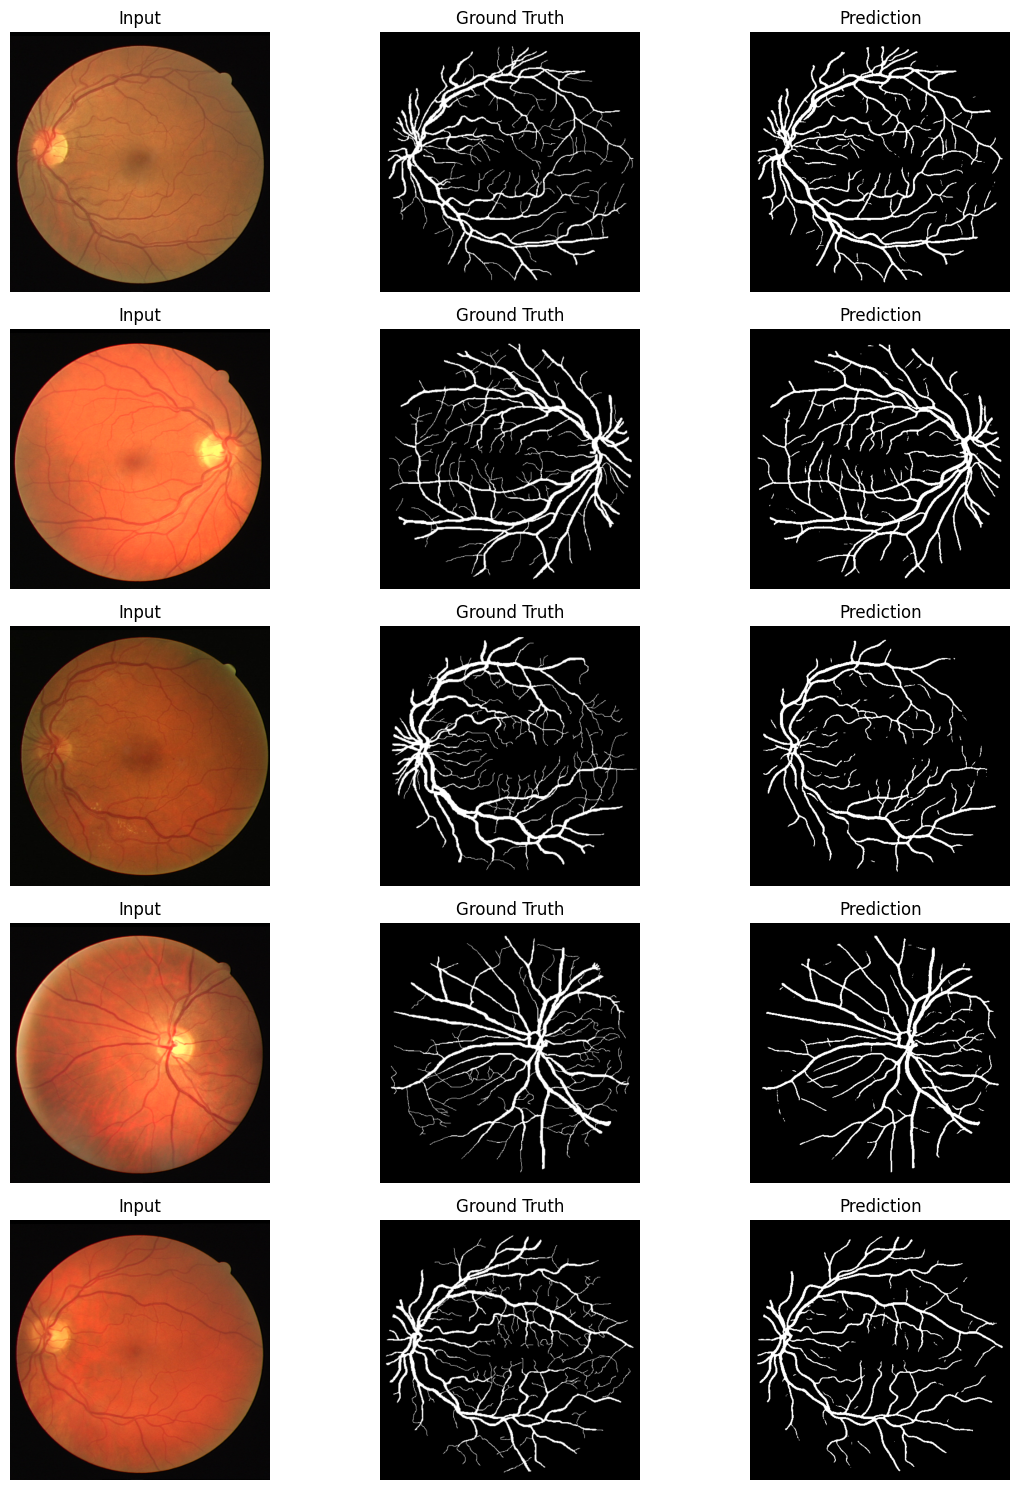

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to result images
results_dir = "results/"
result_files = sorted(os.listdir(results_dir))[:5]  # Get first 5 results

plt.figure(figsize=(12, 15))

for idx, file_name in enumerate(result_files):
    img_path = os.path.join(results_dir, file_name)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Split the concatenated image into [input | GT | prediction]
    h, w, _ = image.shape
    section_width = (w - 20) // 3  # 10 px gap between sections
    input_img = image[:, :section_width]
    gt_mask = image[:, section_width+10:section_width*2+10]
    pred_mask = image[:, section_width*2+20:]

    # Plot the row
    plt.subplot(5, 3, idx * 3 + 1)
    plt.imshow(input_img)
    plt.title("Input")
    plt.axis('off')

    plt.subplot(5, 3, idx * 3 + 2)
    plt.imshow(gt_mask)
    plt.title("Ground Truth")
    plt.axis('off')

    plt.subplot(5, 3, idx * 3 + 3)
    plt.imshow(pred_mask)
    plt.title("Prediction")
    plt.axis('off')

plt.tight_layout()
plt.show()
